In this notebook we will show how the functions we defined in `utils.py` work on the frist train image (`train_00`) and how they are used to make the predictions. If you need more in depth descriptions, in `utils.py` you find all the functions well commented.

### Imports

In [1]:
# !pip install treys
# !pip install termcolor
# !pip install pandas

In [2]:
from this import d
from turtle import left
import time

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [3]:
from typing import List, Union
import os
from copy import copy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from scipy.fft import fft
from scipy.interpolate import interp1d

In [5]:
import skimage
from skimage.transform import rotate, resize
from skimage.morphology import binary_erosion, dilation, opening, closing, disk, binary_closing
from skimage.color import rgb2gray, rgb2hsv
from skimage.filters import median, gaussian
from skimage.measure import find_contours
from skimage.exposure import match_histograms
import skimage.exposure as e

In [6]:
from IPython.display import Image, display, clear_output

In [7]:
import cv2
import PIL.Image

In [8]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [9]:
from utils_finals import *

### Example of functioning

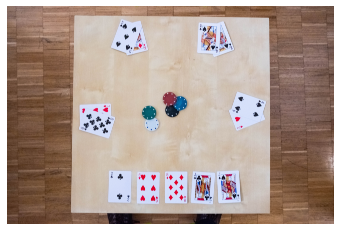

In [10]:
path_data = "data/train"
img_name = "train_00"

file = os.path.join(path_data, img_name+".jpg")
im = skimage.io.imread(file)
plt.imshow(im)
plt.axis("off")
plt.show()

We start using our functions `plot` and `corners` to get the four corners of the table.

In [11]:
hull, edges, contours = plot(im)
#here we shift up the corners as the image have been expanded in the "plot" function (see in utils.py for more details)
corn = corners(hull, im) - np.tile(np.array([0,100]), (4, 1)) 
corn

array([[4778,  248],
       [4793, 3773],
       [1209, 3767],
       [1274,  205]])

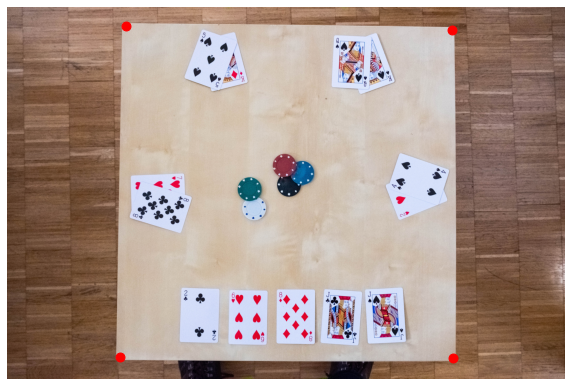

In [12]:
fig, axs = plt.subplots(1 ,figsize=(10,10))
plt.scatter(corn[:,0], corn[:,1], s =80, c = "red")
plt.imshow(im)
plt.axis('off')
plt.show()

Now, that we have identified the table, we can crop it and move forward. Using the function `deskew`, the table will be cut and deskewed in order to have a better analysis (Pay attention that the function `deskew` already does all the steps above, so it take the image as input).

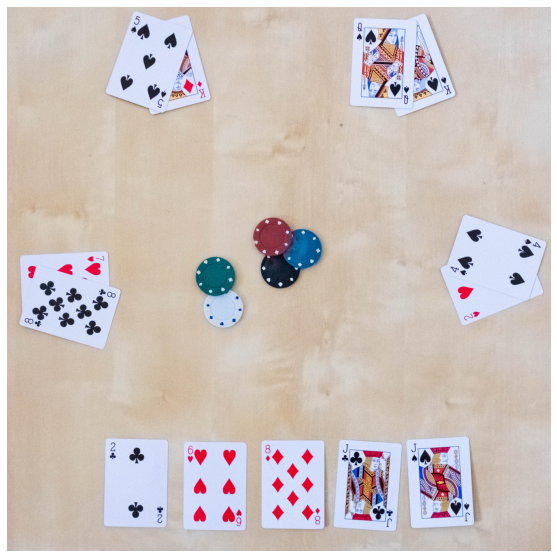

In [13]:
fig, axs = plt.subplots(1 ,figsize=(10,10))
deskewed = deskew(im)
plt.imshow(deskewed)
plt.axis('off')
plt.show()

Now the next step is dividing the table in the areas containig the player cards, the table cards, and the fiches using the function `area_partition`.

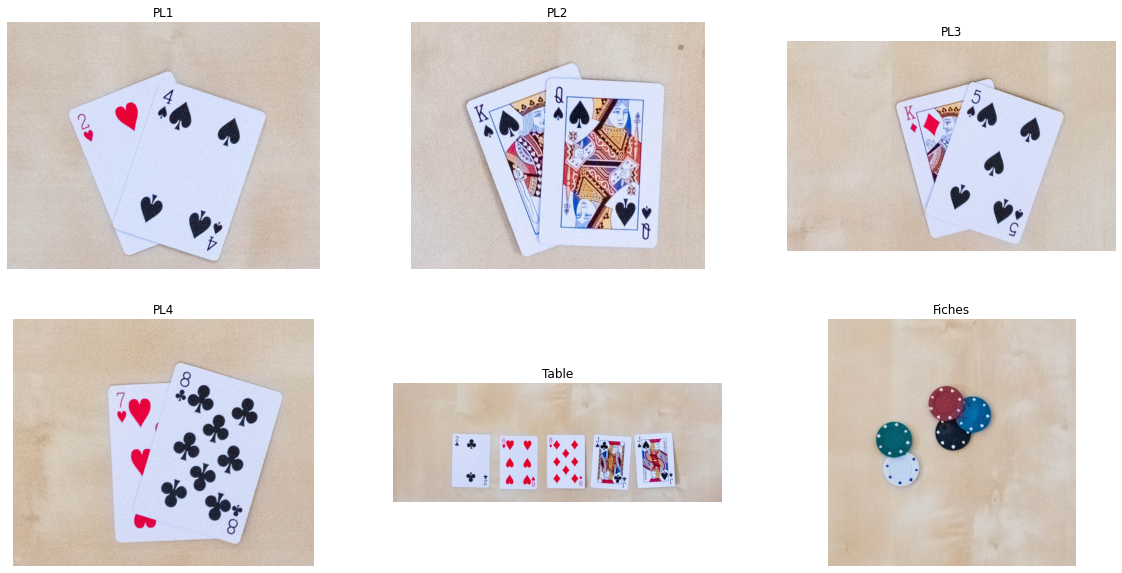

In [14]:
[pl1, pl2, pl3, pl4, table, fiches] = area_partition(deskewed)
all_items = [pl1, pl2, pl3, pl4, table, fiches]
fig, axs = plt.subplots(2, 3 ,figsize=(20,10))
positions = ["PL1", "PL2", "PL3", "PL4", "Table", "Fiches"]
for i in range(6):
    row = i//3
    col = i%3
    axs[row, col].imshow(all_items[i])
    axs[row, col].axis("off")
    axs[row, col].set_title(positions[i])

### Counting the fiches

To count the fiches we only need to pass the cropped fiches image in hsv color space to the function `count_fiches`. The function will return a dictionary with the number of fiches per color, and as you can see it preditcs them correctly.

In [16]:
count_fiches(fiches)

{'red': 1, 'green': 1, 'blue': 1, 'black': 1, 'white': 1}

### Cassifying cards